# Project 1: Classifying Music Genre by Lyrics


# Anthony is here

# Laura is here

In [23]:
from lyricsgenius import Genius
import os
import json
import re
from collections import Counter, defaultdict
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [24]:
# Loading the JSON file
with open("sample_data1.json", "r", encoding="utf-8") as f:
    data = json.load(f)

In [25]:
# Extracting all genres from the JSON
genres = []
for song_id, song_info in data.items():
    genres.append(song_info["genre"])

In [26]:
# Counting how many of each genre
genre_counts = Counter(genres)

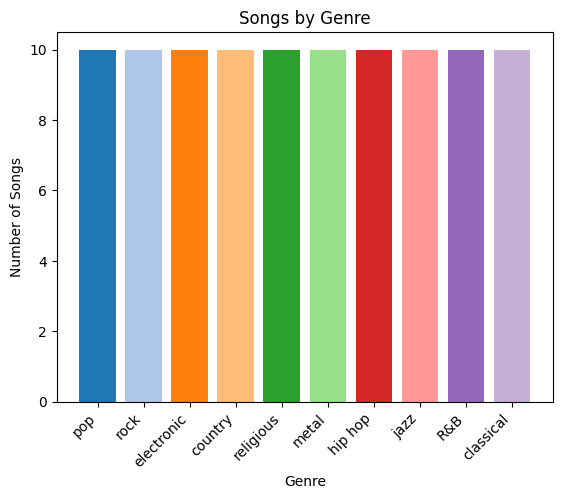

In [27]:
# Plotting a bar chart

colors = plt.cm.tab20.colors  # a palette with 20 distinct colors
bar_colors = [colors[i % len(colors)] for i in range(len(genre_counts))]
plt.bar(genre_counts.keys(), genre_counts.values(), color=bar_colors)
plt.xlabel("Genre")
plt.ylabel("Number of Songs")
plt.title("Songs by Genre")

# Rotate x-axis labels to avoid overlap
plt.xticks(rotation=45, ha='right')

plt.show()

In [28]:
# Sorting the songs by genre
songs_grouped_by_genre = defaultdict(list)

for song_id, song_info in data.items():
    songs_grouped_by_genre[song_info["genre"]].append(song_info)


In [29]:
# Clean the data and prepare for vectorization
def clean_lyrics(lyrics, 
                 keep_linebreaks=False, 
                 lowercase=True, 
                 remove_punctuation=True):
    """
    Cleans song lyrics for vectorization.

    Parameters:
    - lyrics (str): the raw lyrics
    - keep_linebreaks (bool): whether to keep '\n' for stanza separation
    - lowercase (bool): whether to convert all text to lowercase
    - remove_punctuation (bool): whether to strip punctuation

    Returns:
    - str: cleaned lyrics
    """
    if lyrics is None:
        return ""

    # Replace unicode formatting spaces with normal space
    lyrics = lyrics.replace('\u2005', ' ').replace('\xa0', ' ')

    # Optionally replace newlines with space
    if not keep_linebreaks:
        lyrics = lyrics.replace('\n', ' ')

    # Lowercase
    if lowercase:
        lyrics = lyrics.lower()

    # Remove punctuation
    if remove_punctuation:
        lyrics = re.sub(r"[^\w\s]", "", lyrics)

    # Normalize multiple spaces
    lyrics = re.sub(r"\s+", " ", lyrics).strip()

    return lyrics

for genre in songs_grouped_by_genre:
    current_genre_songs = songs_grouped_by_genre[genre]
    for song in current_genre_songs:
        if song.get("lyrics") is None:
            continue
        song["lyrics"] = clean_lyrics(song["lyrics"])

In [30]:
print(songs_grouped_by_genre["pop"][0]["lyrics"])

i know you wanted me to stay but i cant ignore the crazy visions of me in la and i heard that theres a special place where boys and girls can all be queens every single day im having wicked dreams of leaving tennessee hear santa monica i swear its calling me wont make my mama proud its gonna cause a scene she sees her baby girl i know shes gonna scream god what have you done youre a pink pony girl and you dance at the club oh mama im just having fun on the stage in my heels its where i belong down at the pink pony club im gonna keep on dancing at the pink pony club im gonna keep on dancing down in west hollywood im gonna keep on dancing at the pink pony club pink pony club im up and jaws are on the floor lovers in the bathroom and a line outside the door black lights and a mirrored disco ball every nights another reason why i left it all i thank my wicked dreams a year from tennessee oh santa monica youve been too good to me wont make my mama proud its gonna cause a scene she sees her 

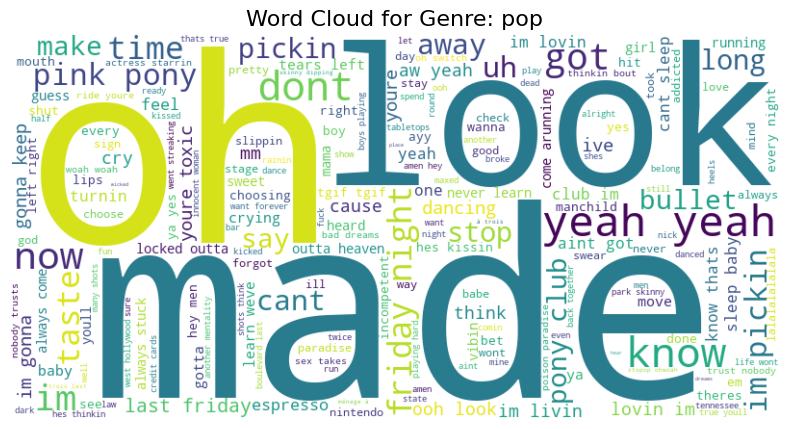

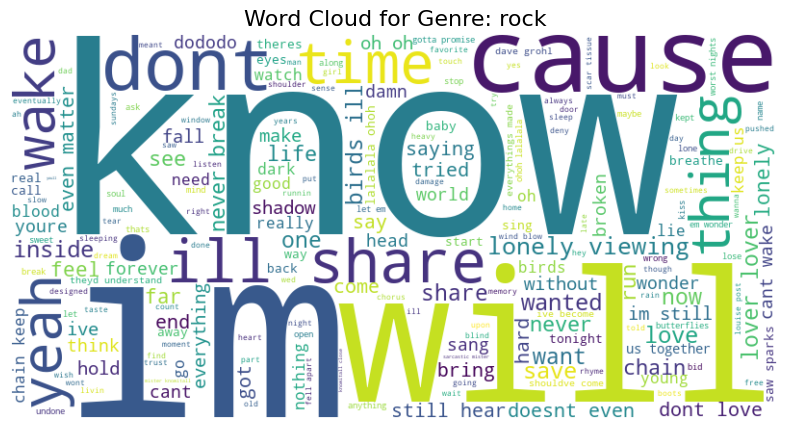

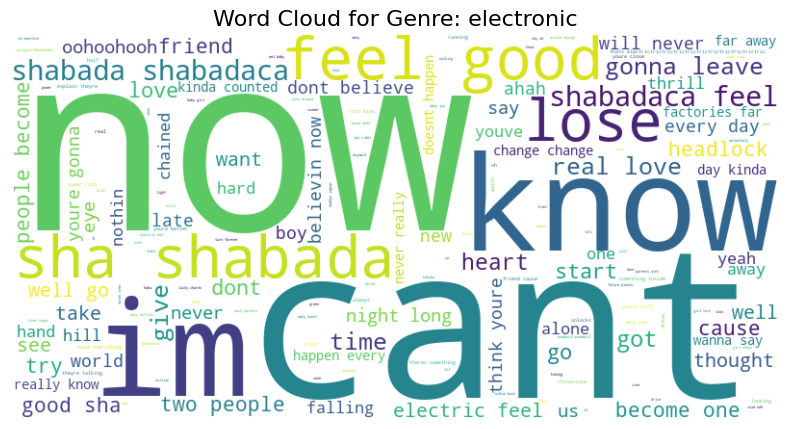

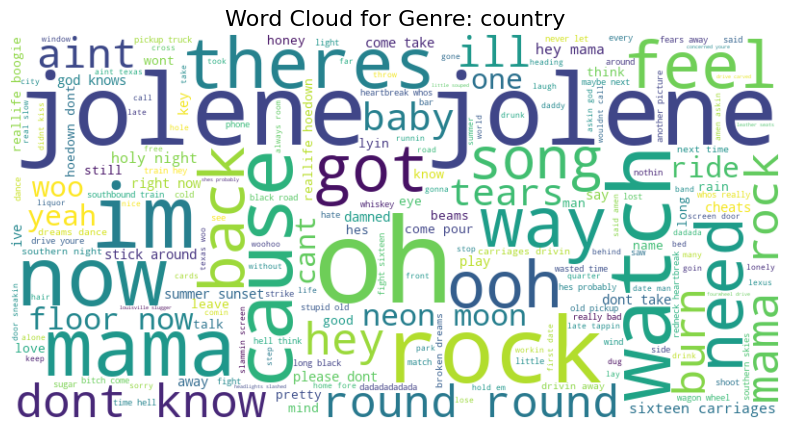

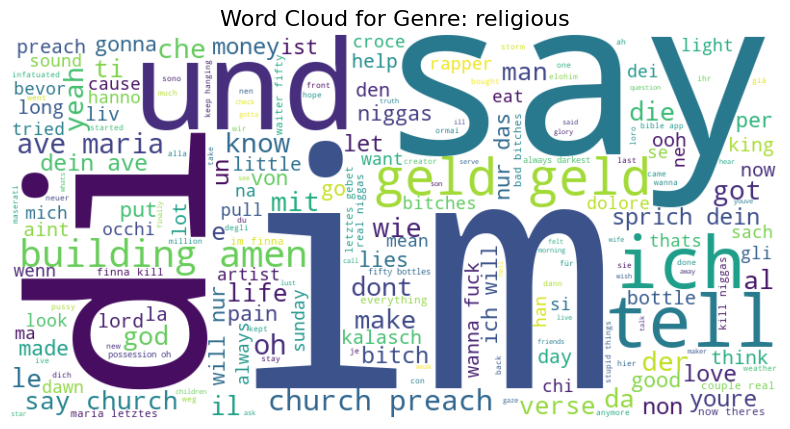

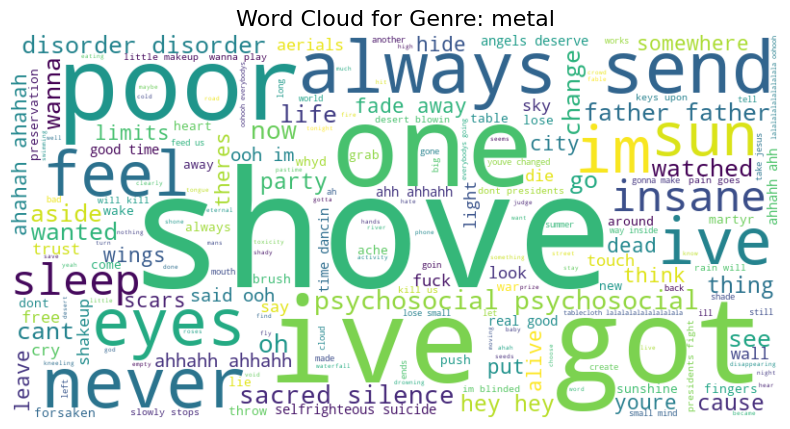

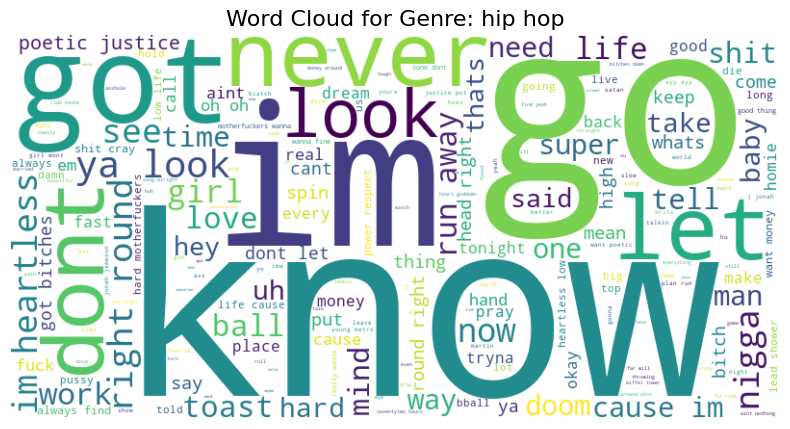

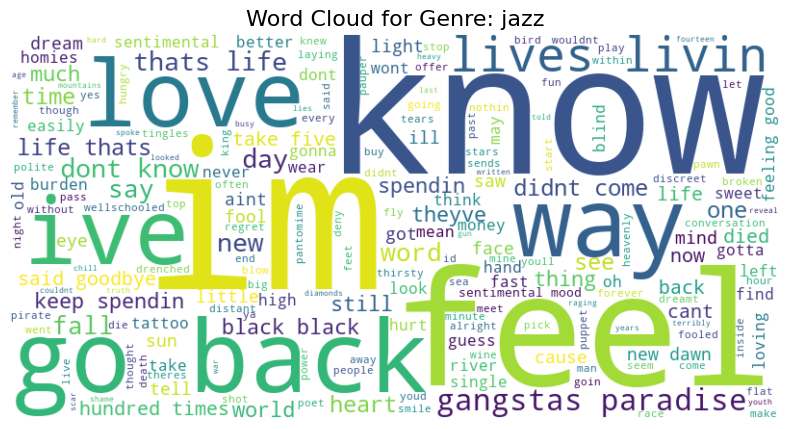

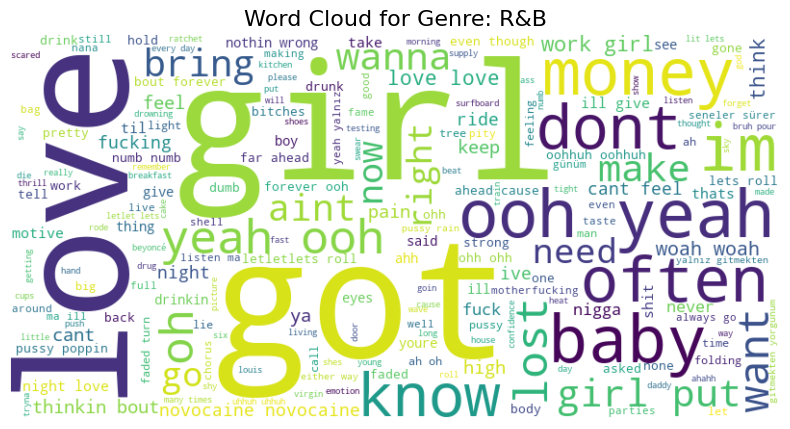

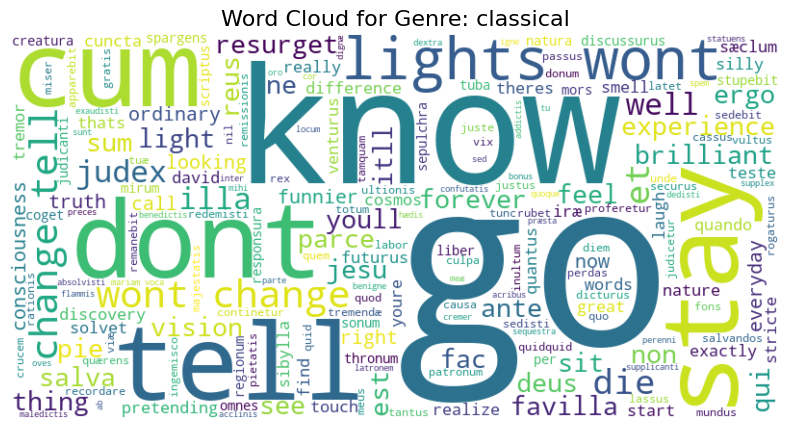

In [31]:
# Generating word cloud for each genre
for genre in songs_grouped_by_genre:
    # Collect all lyrics for this genre into one big string
    lyrics_list = []
    for song in songs_grouped_by_genre[genre]:
        if song.get("lyrics") is not None and song["lyrics"].strip():
            lyrics_list.append(song["lyrics"])
    
    if not lyrics_list:  # skip if no valid lyrics
        continue
    
    lyrics_text = " ".join(lyrics_list)

    # Generate word cloud
    wc = WordCloud(width=800, height=400, background_color="white").generate(lyrics_text)

    # Plot
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for Genre: {genre}", fontsize=16)
    plt.show()